# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [30]:
# Dependencies and Setup
#Anusha Challenge 6 Submission 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress 
import scipy.stats as st
from scipy.stats import sem

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [47]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
#cities

Number of cities in the list: 624


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [48]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []
lat = []
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    query_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    #city_url= f"{url}appid={weather_api_key}&units={units}&q="
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url+city)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        
        response = requests.get(query_url + city).json()
    #city_lat =lat.append(response['coord']['lat'])
    #temp.append(response['main']['temp'])    
        
       
        city_lat = response["coord"]["lat"]
        city_lng = response['coord']['lon']
        city_temp_max = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_temp_max,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
       print("City not found. Skipping...")
       pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bilibino
Processing Record 2 of Set 1 | lianhe
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | margaret river
Processing Record 6 of Set 1 | semera
Processing Record 7 of Set 1 | vila velha
Processing Record 8 of Set 1 | taiohae
City not found. Skipping...
Processing Record 9 of Set 1 | petropavlovsk-kamchatsky
Processing Record 10 of Set 1 | enewetak
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | utrik
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | turpan
Processing Record 15 of Set 1 | blackmans bay
Processing Record 16 of Set 1 | whitehorse
Processing Record 17 of Set 1 | ribeira grande
Processing Record 18 of Set 1 | afaahiti
Processing Record 19 of Set 1 | peace river
Processing Record 20 of Set 1 | vorgashor
Processing Record 21 of Set 1 | grytviken
Proces

Processing Record 40 of Set 4 | bac lieu
Processing Record 41 of Set 4 | san antonio de pale
Processing Record 42 of Set 4 | caleta de carquin
Processing Record 43 of Set 4 | mejit
Processing Record 44 of Set 4 | regina
Processing Record 45 of Set 4 | laojunmiao
Processing Record 46 of Set 4 | ishigaki
Processing Record 47 of Set 4 | pathein
Processing Record 48 of Set 4 | tuskegee
Processing Record 49 of Set 4 | faro
Processing Record 0 of Set 5 | burabay
Processing Record 1 of Set 5 | kosh-agach
Processing Record 2 of Set 5 | hagere maryam
Processing Record 3 of Set 5 | khorixas
Processing Record 4 of Set 5 | holdrege
Processing Record 5 of Set 5 | montenegro
Processing Record 6 of Set 5 | kyren
Processing Record 7 of Set 5 | vingt cinq
City not found. Skipping...
Processing Record 8 of Set 5 | fisterra
Processing Record 9 of Set 5 | linfen
Processing Record 10 of Set 5 | utica
Processing Record 11 of Set 5 | timberlake
Processing Record 12 of Set 5 | udachny
Processing Record 13 of 

City not found. Skipping...
Processing Record 31 of Set 8 | rodolfo sanchez taboada
Processing Record 32 of Set 8 | oneonta
Processing Record 33 of Set 8 | ratnagiri
Processing Record 34 of Set 8 | kavaratti
Processing Record 35 of Set 8 | dass
Processing Record 36 of Set 8 | magadan
Processing Record 37 of Set 8 | ilhabela
Processing Record 38 of Set 8 | bamboo flat
Processing Record 39 of Set 8 | borogontsy
Processing Record 40 of Set 8 | san luis de la loma
Processing Record 41 of Set 8 | bam
Processing Record 42 of Set 8 | pimentel
Processing Record 43 of Set 8 | qaisumah
Processing Record 44 of Set 8 | smithers
Processing Record 45 of Set 8 | znamenskoye
Processing Record 46 of Set 8 | embrun
Processing Record 47 of Set 8 | naama
Processing Record 48 of Set 8 | beloyarskiy
Processing Record 49 of Set 8 | dali
Processing Record 0 of Set 9 | coruripe
Processing Record 1 of Set 9 | meftah
Processing Record 2 of Set 9 | barclayville
Processing Record 3 of Set 9 | kaiapoi
Processing Re

Processing Record 21 of Set 12 | nadym
Processing Record 22 of Set 12 | laayoune plage
City not found. Skipping...
Processing Record 23 of Set 12 | pacific grove
Processing Record 24 of Set 12 | stephenville
Processing Record 25 of Set 12 | ljusdal
Processing Record 26 of Set 12 | fortuna
Processing Record 27 of Set 12 | bafq
Processing Record 28 of Set 12 | fort st. john
Processing Record 29 of Set 12 | alvaraes
Processing Record 30 of Set 12 | karratha
Processing Record 31 of Set 12 | greenville
Processing Record 32 of Set 12 | praia da vitoria
Processing Record 33 of Set 12 | saint-joseph
Processing Record 34 of Set 12 | valparaiso
Processing Record 35 of Set 12 | dellys
Processing Record 36 of Set 12 | koryazhma
Processing Record 37 of Set 12 | tomah
Processing Record 38 of Set 12 | eastham
Processing Record 39 of Set 12 | hayma'
City not found. Skipping...
Processing Record 40 of Set 12 | prestea
Processing Record 41 of Set 12 | finote selam
Processing Record 42 of Set 12 | posto 

In [49]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          595
Lat           595
Lng           595
Max Temp      595
Humidity      595
Cloudiness    595
Wind Speed    595
Country       595
Date          595
dtype: int64

In [50]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bilibino,68.0546,166.4372,16.51,37,89,2.60,RU,1691628469
1,lianhe,47.1333,129.2667,20.89,95,100,1.16,CN,1691628827
2,adamstown,-25.0660,-130.1015,19.26,60,100,9.46,PN,1691628462
3,edinburgh of the seven seas,-37.0676,-12.3116,10.57,58,52,10.93,SH,1691628653
4,margaret river,-33.9500,115.0667,10.55,86,100,2.07,AU,1691628459


In [51]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [52]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,16.51,37,89,2.60,RU,1691628469
1,lianhe,47.1333,129.2667,20.89,95,100,1.16,CN,1691628827
2,adamstown,-25.0660,-130.1015,19.26,60,100,9.46,PN,1691628462
3,edinburgh of the seven seas,-37.0676,-12.3116,10.57,58,52,10.93,SH,1691628653
4,margaret river,-33.9500,115.0667,10.55,86,100,2.07,AU,1691628459


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

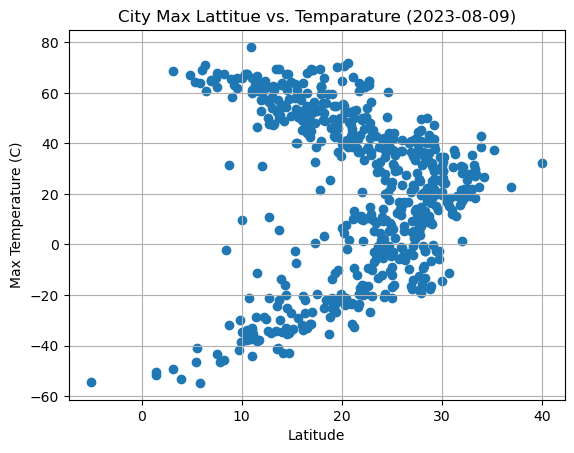

In [59]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Max Temp"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(zorder=0)
plt.title("City Max Lattitue vs. Temparature (2023-08-09)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

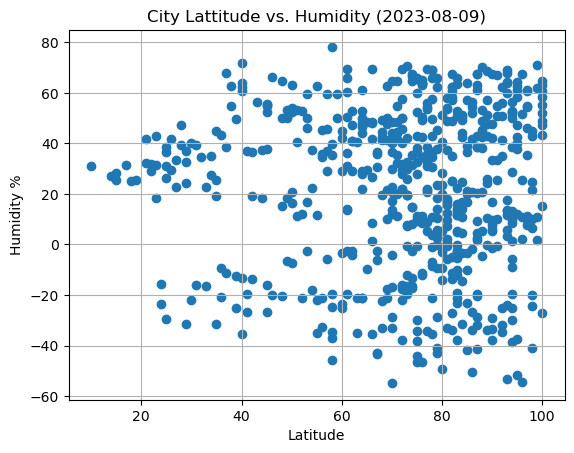

In [60]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Humidity"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid(zorder=0)
plt.title("City Lattitude vs. Humidity (2023-08-09)")
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

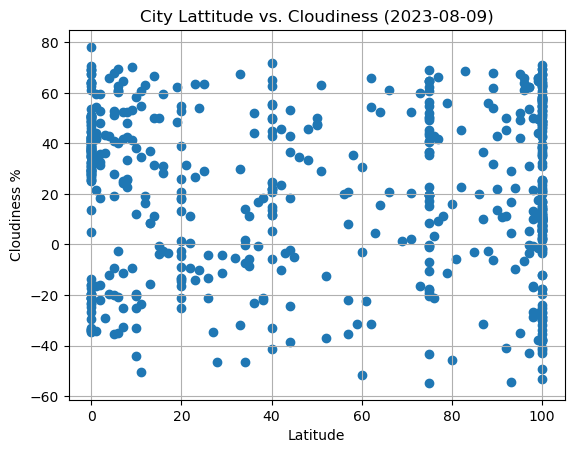

In [61]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Cloudiness"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("City Lattitude vs. Cloudiness (2023-08-09)")
plt.grid(zorder=0)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

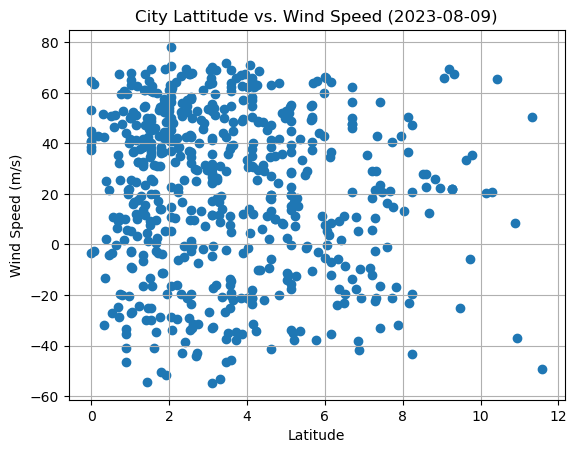

In [62]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Wind Speed"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Lattitude vs. Wind Speed (2023-08-09)")
plt.grid(zorder=0)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [63]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):
    r = st.pearsonr(x, y)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [64]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,16.51,37,89,2.60,RU,1691628469
1,lianhe,47.1333,129.2667,20.89,95,100,1.16,CN,1691628827
5,semera,11.5010,41.2010,25.94,55,100,1.39,ET,1691628723
7,petropavlovsk-kamchatsky,53.0452,158.6483,20.33,52,20,2.00,RU,1691628695
8,enewetak,11.3474,162.3373,28.71,75,78,6.49,MH,1691628650


In [65]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,adamstown,-25.0660,-130.1015,19.26,60,100,9.46,PN,1691628462
3,edinburgh of the seven seas,-37.0676,-12.3116,10.57,58,52,10.93,SH,1691628653
4,margaret river,-33.9500,115.0667,10.55,86,100,2.07,AU,1691628459
6,vila velha,-20.3297,-40.2925,22.97,87,75,3.60,BR,1691628827
13,blackmans bay,-43.0167,147.3167,14.07,67,97,2.72,AU,1691628648


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6630775518302336


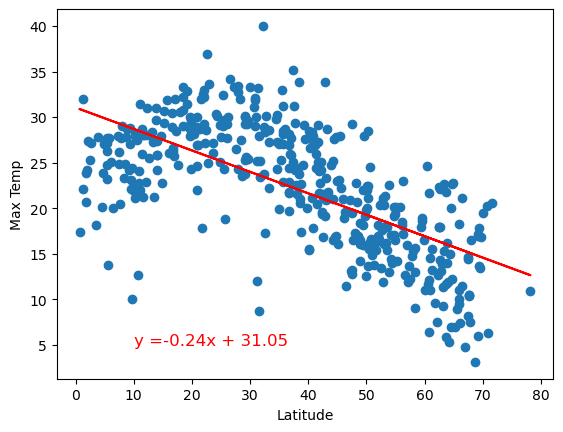

In [87]:

# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"], (10, 5))

The r-value is: 0.809387666106806


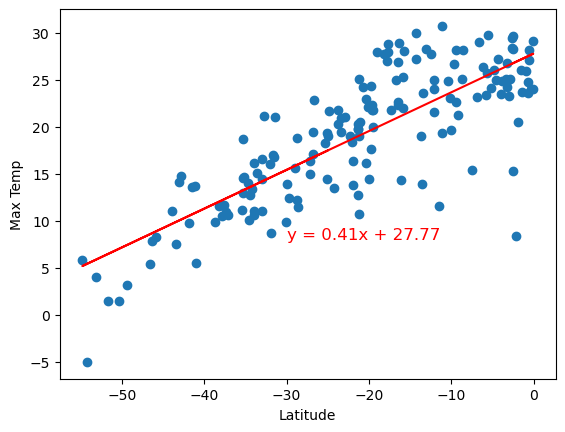

In [88]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"], (-30, 8))

**Relationship between Temperature and Latitude:**  
* There is a fairly strong negative correlation between temperature and latitude with a correlation coefficient of -0.6630775518302336 on Northern Hemisphere.
* There is a relatively strong positive correlation between temperature and latitude with a correlation coefficient of 0.809387666106806 on Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.02235905411151062


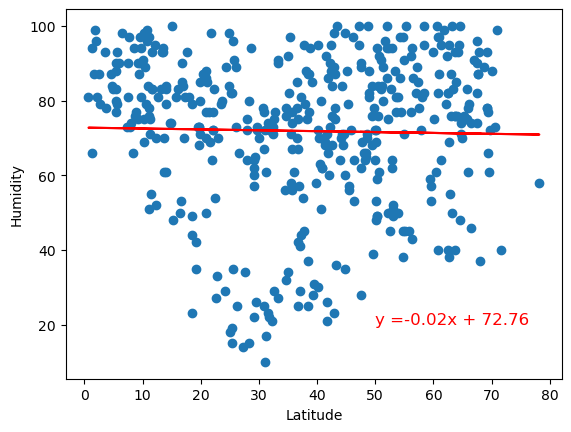

In [92]:

# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Humidity"], (50, 20))

The r-value is: -0.07167628466979396


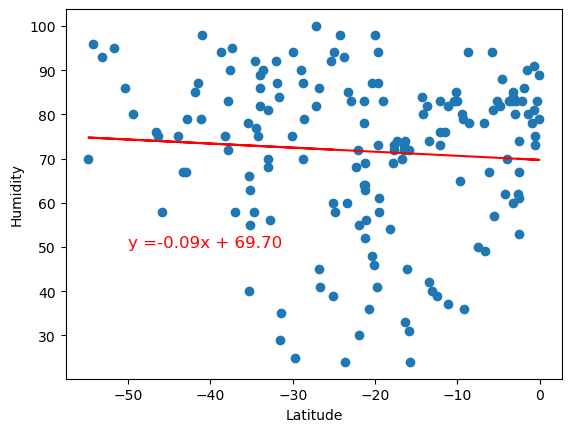

In [94]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Humidity"], (-50, 50))

* There is a relatively mild negative correlation between humidity and latitude with a correlation coefficient of -0.02235905411151062 on Northern Hemisphere.
* There is a relatively mild  negative correlation correlation between humidity and latitude with a correlation coefficient of -0.07167628466979396 on Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.144110857468485


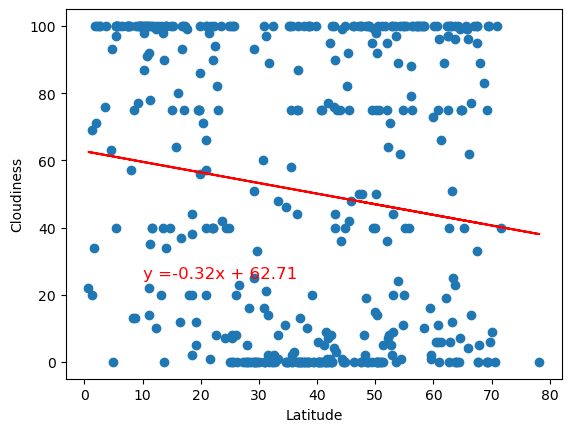

In [96]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness"], (10, 25))

The r-value is: -0.08844928547292052


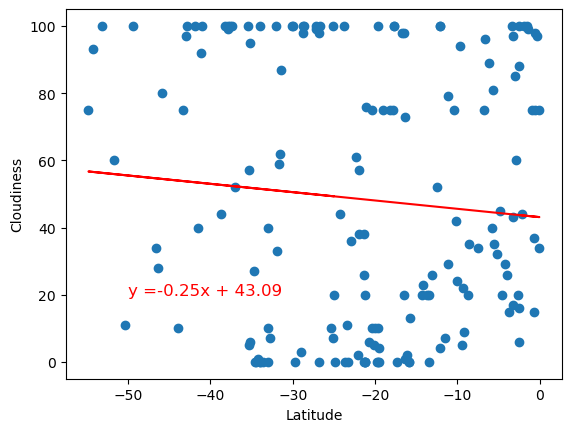

In [98]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness"], (-50, 20))

**Relationship between Cloudiness and Latitude:**  
* There is a negative correlation between cloudiness and latitude with a correlation coefficient of -0.144110857468485 on Northern Hemisphere.
* There is a negative correlation correlation between cloudiness and latitude with a correlation coefficient of -0.08844928547292052 on Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.09705227632084555


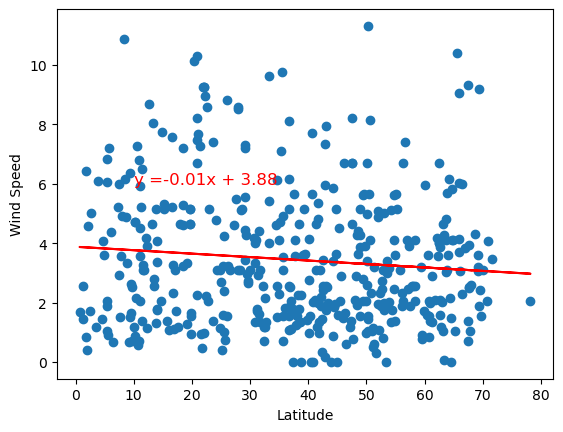

In [100]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Wind Speed"], (10, 6))

The r-value is: 0.001886400280595845


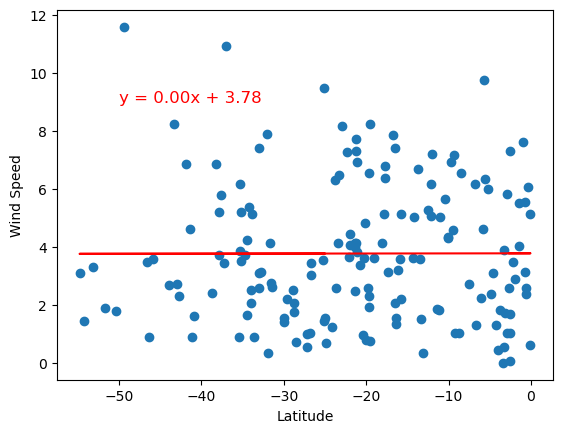

In [101]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed"], (-50, 9))

**Relationship between Wind Speed and Latitude:**  
* There is a negative correlation between wind speed and latitude with a correlation coefficient of -0.09705227632084555 n Northern Hemisphere.
* There is also a positive correlation between wind speed and latitude with a correlation coefficient of 0.001886400280595845 on Southern Hemisphere.